In [1]:
import pandas as pd
pd.set_option('display.max_columns', 1500)

import warnings
warnings.filterwarnings('ignore')

#Extend cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
"""
Created on Mon Mar 18 18:25:50 2019

@author: Uri Smashnov

Purpose: Analyze input Pandas DataFrame and return stats per column
Details: The function calculates levels for categorical variables and allows to analyze summarized information

To view wide table set following Pandas options:
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth',200)
"""
import pandas as pd
def describe_more(df,normalize_ind=False, weight_column=None, skip_columns=[], dropna=True):
    var = [] ; l = [] ; t = []; unq =[]; min_l = []; max_l = [];
    assert isinstance(skip_columns, list), "Argument skip_columns should be list"
    if weight_column is not None:
        if weight_column not in list(df.columns):
            raise AssertionError('weight_column is not a valid column name in the input DataFrame')
      
    for x in df:
        if x in skip_columns:
            pass
        else:
            var.append( x )
            uniq_counts = len(pd.value_counts(df[x],dropna=dropna))
            uniq_counts = len(pd.value_counts(df[x], dropna=dropna)[pd.value_counts(df[x],dropna=dropna)>0])
            l.append(uniq_counts)
            t.append( df[ x ].dtypes )
            min_l.append(df[x].apply(str).str.len().min())
            max_l.append(df[x].apply(str).str.len().max())
            if weight_column is not None and x not in skip_columns:
                df2 = df.groupby(x).agg({weight_column: 'sum'}).sort_values(weight_column, ascending=False)
                df2['authtrans_vts_cnt']=((df2[weight_column])/df2[weight_column].sum()).round(2)
                unq.append(df2.head(n=100).to_dict()[weight_column])
            else:
                df_cat_d = df[x].value_counts(normalize=normalize_ind,dropna=dropna).round(decimals=2)
                df_cat_d = df_cat_d[df_cat_d>0]
                #unq.append(df[x].value_counts().iloc[0:100].to_dict())
                unq.append(df_cat_d.iloc[0:100].to_dict())
            
    levels = pd.DataFrame( { 'A_Variable' : var , 'Levels' : l , 'Datatype' : t ,
                             'Min Length' : min_l,
                             'Max Length': max_l,
                             'Level_Values' : unq} )
    #levels.sort_values( by = 'Levels' , inplace = True )
    return levels

In [3]:
## Importing the data 
data = pd.read_csv("creditcard data.csv")

In [4]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,92345.0,1.724254,0.054124,0.625215,4.308400,-0.532295,0.540379,-0.688445,0.156967,1.476695,0.839266,-0.813357,-2.819262,0.799873,1.042062,-2.245107,0.864097,0.222851,-0.155125,-1.474086,-0.280992,-0.367098,-0.771443,0.364177,-0.100579,-0.547578,-0.348022,-0.011480,-0.023193,62.91,0
149996,92346.0,-3.538487,2.921360,-1.298732,-1.035773,-0.030572,-0.441956,0.631323,0.445681,2.495754,1.441756,-0.936139,-2.269535,2.331951,1.153985,-1.166377,-0.083783,0.210004,-0.290586,0.149528,0.510437,-0.703023,-0.851606,-0.214636,-1.054619,0.305106,0.132541,-1.261532,-1.029257,37.91,0
149997,92347.0,-0.019481,1.224302,-0.132075,-0.678606,1.768679,-0.283992,1.579740,-0.978318,1.874612,0.551191,-0.062260,-2.177707,3.435771,0.690803,-0.247804,-0.597820,-0.464463,0.385454,0.071773,0.552350,-0.036681,1.134522,-0.311552,0.051861,-0.616234,-0.329780,0.220292,-0.232384,3.98,0
149998,92348.0,-0.511063,1.277683,-0.174698,-0.101018,0.970555,-1.040956,1.563977,-1.449619,0.595721,-1.037676,0.121299,-1.930356,2.463757,1.845496,-1.206613,-1.170484,0.729932,-0.194025,0.333821,-0.279702,0.836970,0.470593,-0.314103,0.066781,0.363133,-0.073593,0.183600,0.121156,74.77,0


## Data Pre-processing 

In [5]:
## Checking all the Missing Values 
data.info
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
## Now checking data type
print(data.dtypes)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [7]:
## Getting the summary of data 
summary = data.describe()
print(summary)

                Time             V1             V2             V3  \
count  150000.000000  150000.000000  150000.000000  150000.000000   
mean    54194.355033      -0.242705       0.038023       0.629991   
std     21982.217623       1.819026       1.610616       1.288432   
min         0.000000     -56.407510     -72.715728     -33.680984   
25%     38983.000000      -1.024282      -0.546727       0.126353   
50%     55851.500000      -0.268751       0.116952       0.722469   
75%     72675.000000       1.160957       0.799711       1.346568   
max     92348.000000       2.401777      18.902453       9.382558   

                  V4             V5             V6             V7  \
count  150000.000000  150000.000000  150000.000000  150000.000000   
mean        0.128788      -0.252737       0.072127      -0.104194   
std         1.339578       1.310729       1.287130       1.163326   
min        -5.519697     -42.147898     -26.160506     -31.764946   
25%        -0.727564      -0.8855

In [8]:
import numpy as np
## Converting the time data from seconds to hours 
data['Hour'] = data['Time'].apply(lambda x: np.floor(x / 3600))

In [9]:
tmp = data.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
data = pd.DataFrame(tmp)
data.columns = ['Hour', 'Class', 'Min', 'Max', 'Mean', 'Median', 'Transaction', 'Sum', 'Var']
data.head()

,Hour,Class,Min,Max,Mean,Median,Transaction,Sum,Var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


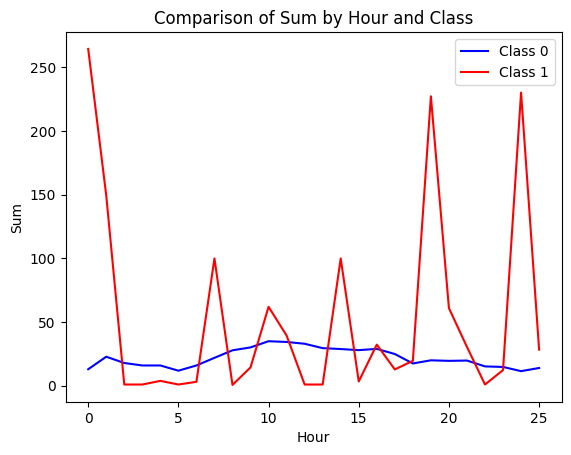

In [10]:
## Graph for Hour and sum
import matplotlib.pyplot as plt
import pandas as pd
# Filter data by Class 0 and 1
class_0_data = data[data['Class'] == 0]
class_1_data = data[data['Class'] == 1]
# Plotting
plt.plot(class_0_data['Hour'], class_0_data['Sum'], color='blue', label='Class 0')
plt.plot(class_1_data['Hour'], class_1_data['Sum'], color='red', label='Class 1')
plt.xlabel('Hour')
plt.ylabel('Sum')
plt.title('Comparison of Sum by Hour and Class')
plt.legend()
plt.show()

In [11]:
## 0 = non fraud , 1 = Fraud 

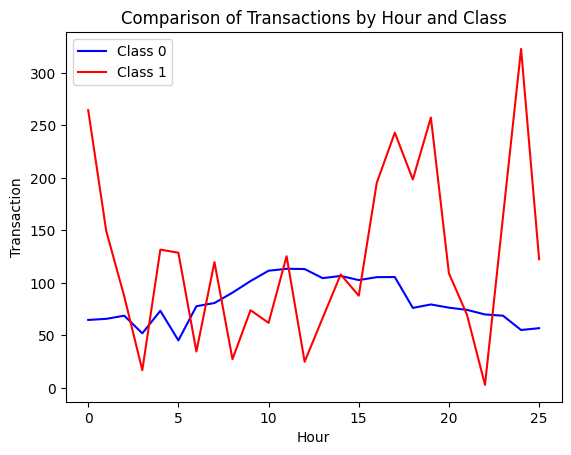

In [12]:
## Graph for Hour and Transactions 
# Plotting
plt.plot(class_0_data['Hour'], class_0_data['Transaction'], color='blue', label='Class 0')
plt.plot(class_1_data['Hour'], class_1_data['Transaction'], color='red', label='Class 1')
plt.xlabel('Hour')
plt.ylabel('Transaction')
plt.title('Comparison of Transactions by Hour and Class')
plt.legend()
plt.show()

## Blue = Non fraud , Red = Fraud 

When we look at the graph, non fraud transations is indicated by blue line and fraudlant cases are indiacted by red one. 
Looking at the graph we can say that non fraudulant cases are peaks most between 10 to 15 hours. More over fraud cases are
very much voletile and they peak our every hour. 

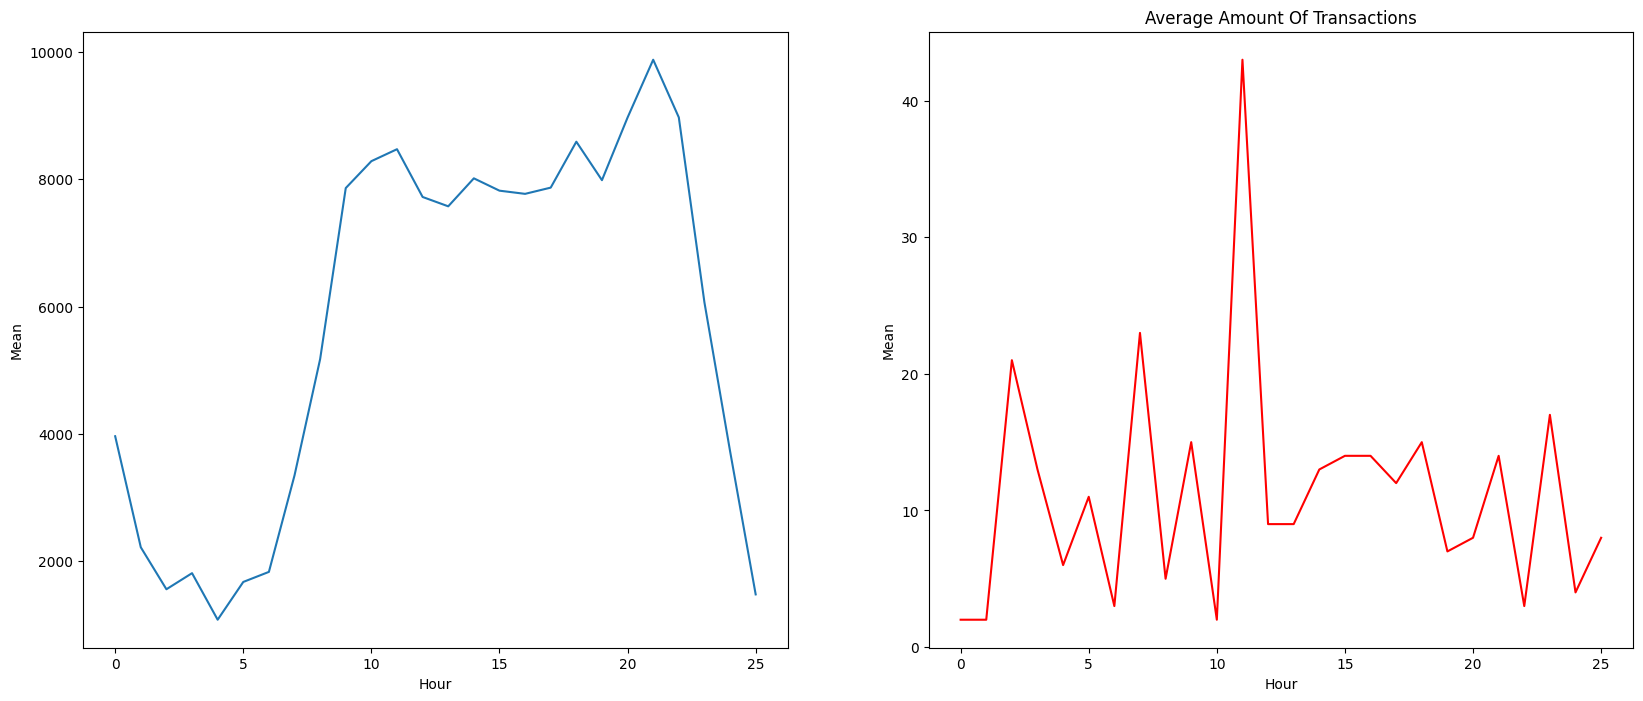

In [13]:
import seaborn as sns
## Plotting line graph 
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,8))
s = sns.lineplot(ax = ax1, x="Hour", y="Mean", data = data.loc[data.Class == 0])
s = sns.lineplot(ax = ax2, x="Hour", y="Mean", data = data.loc[data.Class == 1], color = "red")
plt.title("Average Amount Of Transactions")
plt.show();

Looking at both the graphs above we can say that non fraud cases have a patter and is at the peak between 10 to 25, where as 
for non fraud there is not much pattern in the transactions. 

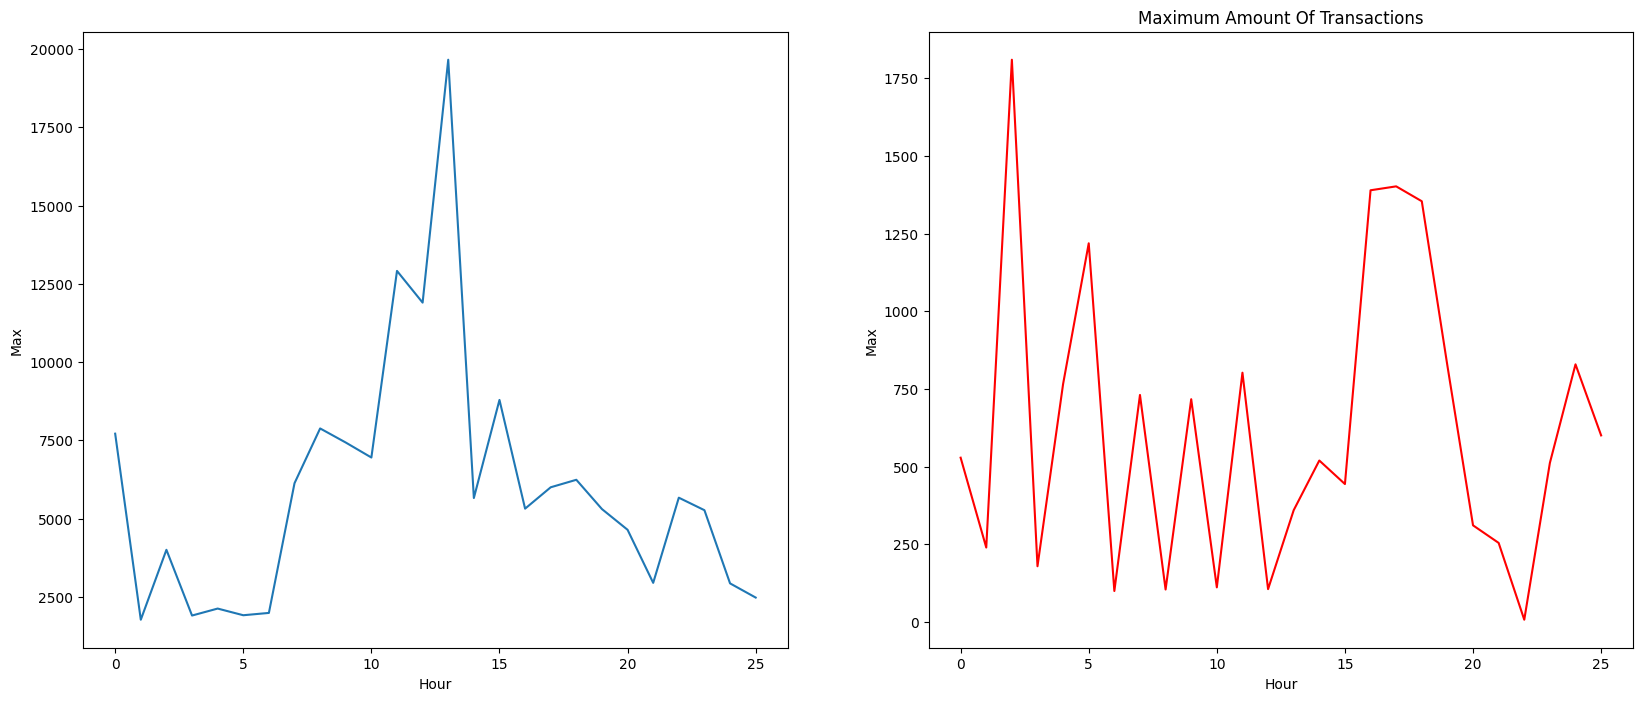

In [14]:
## "Maximum Amount Of Transactions"
import seaborn as sns
## Plotting line graph 
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,8))
s = sns.lineplot(ax = ax1, x="Hour", y="Max", data = data.loc[data.Class == 0])
s = sns.lineplot(ax = ax2, x="Hour", y="Max", data = data.loc[data.Class == 1], color = "red")
plt.title("Maximum Amount Of Transactions")
plt.show();

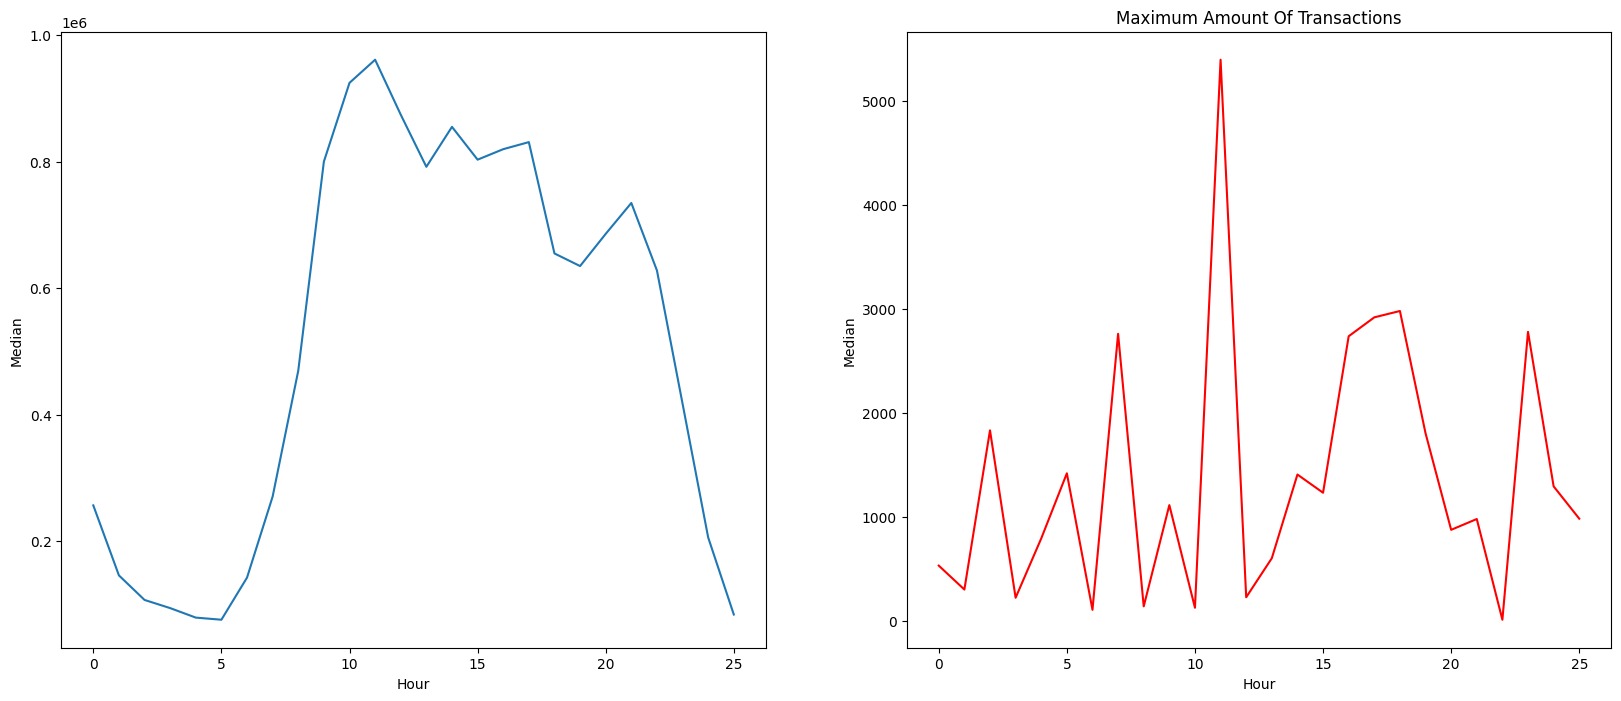

In [15]:
## "Median Amount Of Transactions"
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,8))
s = sns.lineplot(ax = ax1, x="Hour", y="Median", data = data.loc[data.Class == 0])
s = sns.lineplot(ax = ax2, x="Hour", y="Median", data = data.loc[data.Class == 1], color = "red")
plt.title("Maximum Amount Of Transactions")
plt.show();

In [16]:
# ## Plotting the fractions amt 
# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,8))
# s = sns.boxplot(ax = ax1, x = "Class", y="Amount", hue="Class", data = data, palette = "PRGn", showflies = TRUE )

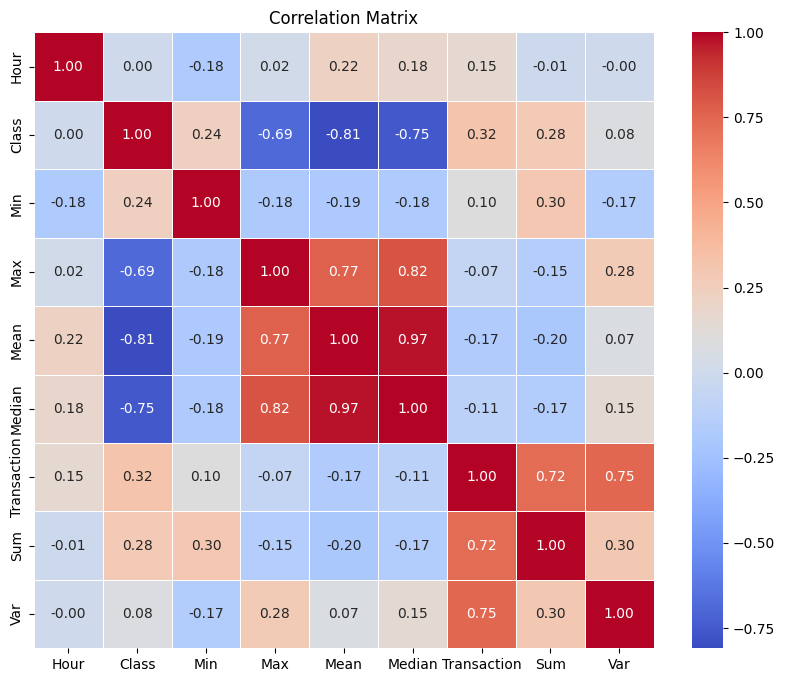

In [17]:
## perfoming corrlation in the dataset 
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

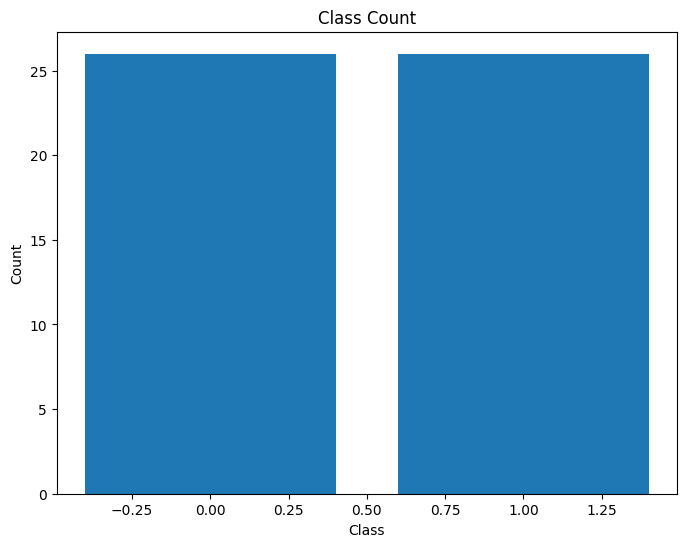

In [18]:
target_counts = data['Class'].value_counts()

plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.bar(target_counts.index, target_counts.values)
plt.title("Class Count")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

## Module 3 

In [19]:
data2 = pd.read_csv("creditcard data.csv")

## Data preprocessing - feature Scaling 

In [20]:
## Applying standard scaler for feature engineering to Amount Column 
from sklearn.preprocessing import StandardScaler
amount = data2['Amount']

amount_reshaped = amount.values.reshape(-1, 1)
scaler = StandardScaler()
scaler.fit(amount_reshaped)
amount_scaled = scaler.transform(amount_reshaped)
data2['Amount'] = amount_scaled

In [21]:
data2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.248273,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.355879,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.190047,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140872,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.079152,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,92345.0,1.724254,0.054124,0.625215,4.308400,-0.532295,0.540379,-0.688445,0.156967,1.476695,0.839266,-0.813357,-2.819262,0.799873,1.042062,-2.245107,0.864097,0.222851,-0.155125,-1.474086,-0.280992,-0.367098,-0.771443,0.364177,-0.100579,-0.547578,-0.348022,-0.011480,-0.023193,-0.108264,0
149996,92346.0,-3.538487,2.921360,-1.298732,-1.035773,-0.030572,-0.441956,0.631323,0.445681,2.495754,1.441756,-0.936139,-2.269535,2.331951,1.153985,-1.166377,-0.083783,0.210004,-0.290586,0.149528,0.510437,-0.703023,-0.851606,-0.214636,-1.054619,0.305106,0.132541,-1.261532,-1.029257,-0.211060,0
149997,92347.0,-0.019481,1.224302,-0.132075,-0.678606,1.768679,-0.283992,1.579740,-0.978318,1.874612,0.551191,-0.062260,-2.177707,3.435771,0.690803,-0.247804,-0.597820,-0.464463,0.385454,0.071773,0.552350,-0.036681,1.134522,-0.311552,0.051861,-0.616234,-0.329780,0.220292,-0.232384,-0.350575,0
149998,92348.0,-0.511063,1.277683,-0.174698,-0.101018,0.970555,-1.040956,1.563977,-1.449619,0.595721,-1.037676,0.121299,-1.930356,2.463757,1.845496,-1.206613,-1.170484,0.729932,-0.194025,0.333821,-0.279702,0.836970,0.470593,-0.314103,0.066781,0.363133,-0.073593,0.183600,0.121156,-0.059498,0


In [22]:
## Dropping time column as we dont need it for further analysis 
data2.drop(columns='Time', inplace=True)

In [23]:
data2

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.248273,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.355879,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.190047,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140872,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.079152,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1.724254,0.054124,0.625215,4.308400,-0.532295,0.540379,-0.688445,0.156967,1.476695,0.839266,-0.813357,-2.819262,0.799873,1.042062,-2.245107,0.864097,0.222851,-0.155125,-1.474086,-0.280992,-0.367098,-0.771443,0.364177,-0.100579,-0.547578,-0.348022,-0.011480,-0.023193,-0.108264,0
149996,-3.538487,2.921360,-1.298732,-1.035773,-0.030572,-0.441956,0.631323,0.445681,2.495754,1.441756,-0.936139,-2.269535,2.331951,1.153985,-1.166377,-0.083783,0.210004,-0.290586,0.149528,0.510437,-0.703023,-0.851606,-0.214636,-1.054619,0.305106,0.132541,-1.261532,-1.029257,-0.211060,0
149997,-0.019481,1.224302,-0.132075,-0.678606,1.768679,-0.283992,1.579740,-0.978318,1.874612,0.551191,-0.062260,-2.177707,3.435771,0.690803,-0.247804,-0.597820,-0.464463,0.385454,0.071773,0.552350,-0.036681,1.134522,-0.311552,0.051861,-0.616234,-0.329780,0.220292,-0.232384,-0.350575,0
149998,-0.511063,1.277683,-0.174698,-0.101018,0.970555,-1.040956,1.563977,-1.449619,0.595721,-1.037676,0.121299,-1.930356,2.463757,1.845496,-1.206613,-1.170484,0.729932,-0.194025,0.333821,-0.279702,0.836970,0.470593,-0.314103,0.066781,0.363133,-0.073593,0.183600,0.121156,-0.059498,0


In [24]:
## Checking the duplicate values in the dataset
data2.duplicated().sum()
## Removing duplicate values 
data2.drop_duplicates(inplace=True)

In [25]:
data2

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.248273,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.355879,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.190047,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140872,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.079152,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1.724254,0.054124,0.625215,4.308400,-0.532295,0.540379,-0.688445,0.156967,1.476695,0.839266,-0.813357,-2.819262,0.799873,1.042062,-2.245107,0.864097,0.222851,-0.155125,-1.474086,-0.280992,-0.367098,-0.771443,0.364177,-0.100579,-0.547578,-0.348022,-0.011480,-0.023193,-0.108264,0
149996,-3.538487,2.921360,-1.298732,-1.035773,-0.030572,-0.441956,0.631323,0.445681,2.495754,1.441756,-0.936139,-2.269535,2.331951,1.153985,-1.166377,-0.083783,0.210004,-0.290586,0.149528,0.510437,-0.703023,-0.851606,-0.214636,-1.054619,0.305106,0.132541,-1.261532,-1.029257,-0.211060,0
149997,-0.019481,1.224302,-0.132075,-0.678606,1.768679,-0.283992,1.579740,-0.978318,1.874612,0.551191,-0.062260,-2.177707,3.435771,0.690803,-0.247804,-0.597820,-0.464463,0.385454,0.071773,0.552350,-0.036681,1.134522,-0.311552,0.051861,-0.616234,-0.329780,0.220292,-0.232384,-0.350575,0
149998,-0.511063,1.277683,-0.174698,-0.101018,0.970555,-1.040956,1.563977,-1.449619,0.595721,-1.037676,0.121299,-1.930356,2.463757,1.845496,-1.206613,-1.170484,0.729932,-0.194025,0.333821,-0.279702,0.836970,0.470593,-0.314103,0.066781,0.363133,-0.073593,0.183600,0.121156,-0.059498,0


In [26]:
## Data pre processing for analysis 
X = data2.drop('Class', axis=1)
Y = data2['Class']

In [27]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X, Y)
## Resampled 
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['Class'] = y_resampled
print("Original class distribution:")
print(data2['Class'].value_counts())

print("\nResampled class distribution:")
print(resampled_df['Class'].value_counts())

Original class distribution:
0    145082
1       284
Name: Class, dtype: int64

Resampled class distribution:
0    145082
1    145082
Name: Class, dtype: int64


In [28]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.248273
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.355879
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.190047
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140872
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.079152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1.724254,0.054124,0.625215,4.308400,-0.532295,0.540379,-0.688445,0.156967,1.476695,0.839266,-0.813357,-2.819262,0.799873,1.042062,-2.245107,0.864097,0.222851,-0.155125,-1.474086,-0.280992,-0.367098,-0.771443,0.364177,-0.100579,-0.547578,-0.348022,-0.011480,-0.023193,-0.108264
149996,-3.538487,2.921360,-1.298732,-1.035773,-0.030572,-0.441956,0.631323,0.445681,2.495754,1.441756,-0.936139,-2.269535,2.331951,1.153985,-1.166377,-0.083783,0.210004,-0.290586,0.149528,0.510437,-0.703023,-0.851606,-0.214636,-1.054619,0.305106,0.132541,-1.261532,-1.029257,-0.211060
149997,-0.019481,1.224302,-0.132075,-0.678606,1.768679,-0.283992,1.579740,-0.978318,1.874612,0.551191,-0.062260,-2.177707,3.435771,0.690803,-0.247804,-0.597820,-0.464463,0.385454,0.071773,0.552350,-0.036681,1.134522,-0.311552,0.051861,-0.616234,-0.329780,0.220292,-0.232384,-0.350575
149998,-0.511063,1.277683,-0.174698,-0.101018,0.970555,-1.040956,1.563977,-1.449619,0.595721,-1.037676,0.121299,-1.930356,2.463757,1.845496,-1.206613,-1.170484,0.729932,-0.194025,0.333821,-0.279702,0.836970,0.470593,-0.314103,0.066781,0.363133,-0.073593,0.183600,0.121156,-0.059498


In [29]:
from sklearn.model_selection import train_test_split
## Now spliiting the X,Y intro train test dataset as 80,20 ratio (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (116292, 29) (116292,)
Testing set shape: (29074, 29) (29074,)


## Module 4 

# Model 1 - Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
## Fitting the logistic Regression on the model 
# Create a Logistic Regression model
logreg_model = LogisticRegression()

# Train the model on the training data
logreg_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logreg_model.predict(X_test)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report_lr = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.999552865102841
Confusion Matrix:
 [[29011     4]
 [    9    50]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29015
           1       0.93      0.85      0.88        59

    accuracy                           1.00     29074
   macro avg       0.96      0.92      0.94     29074
weighted avg       1.00      1.00      1.00     29074



# Model -2 Decision Tree Classifier 

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Creating a decision tree 
data_classifier = DecisionTreeClassifier(random_state=42)
# Train the classifier on the training data
data_classifier.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = data_classifier.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred)
print("Accuracy Decison Tree:", accuracy)

# Confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred)
print("Confusion Matrix Decison Tree:\n", conf_matrix)

# Classification report
class_report_dt = classification_report(y_test, y_pred)
print("Classification Report Decison Tree:\n", class_report)

Accuracy Decison Tree: 0.999552865102841
Confusion Matrix Decison Tree:
 [[29011     4]
 [    9    50]]
Classification Report Decison Tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29015
           1       0.93      0.85      0.88        59

    accuracy                           1.00     29074
   macro avg       0.96      0.92      0.94     29074
weighted avg       1.00      1.00      1.00     29074



# Model 3 - Random Forest Classifer 

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Creating a random forest 
data_randomforest = RandomForestClassifier(random_state=42)
# Train the classifier on the training data
data_randomforest.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = data_randomforest.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy Random Forest:", accuracy)

# Confusion matrix
conf_matrix_fr = confusion_matrix(y_test, y_pred)
print("Confusion Matrix Random Forest:\n", conf_matrix)

# Classification report
class_report_rf = classification_report(y_test, y_pred)
print("Classification Report Random Forest:\n", class_report)

Accuracy Random Forest: 0.999552865102841
Confusion Matrix Random Forest:
 [[29011     4]
 [    9    50]]
Classification Report Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29015
           1       0.93      0.85      0.88        59

    accuracy                           1.00     29074
   macro avg       0.96      0.92      0.94     29074
weighted avg       1.00      1.00      1.00     29074



In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize models
logreg_model = LogisticRegression()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()

# Train and evaluate Logistic Regression
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_cm = confusion_matrix(y_test, logreg_pred)
logreg_cr = classification_report(y_test, logreg_pred)

# Train and evaluate Decision Tree
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_cm = confusion_matrix(y_test, dt_pred)
dt_cr = classification_report(y_test, dt_pred)

# Train and evaluate Random Forest
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_cm = confusion_matrix(y_test, rf_pred)
rf_cr = classification_report(y_test, rf_pred)

# Print evaluation results for each model
print("Logistic Regression:")
print("Accuracy:", logreg_accuracy)
print("Confusion Matrix:\n", logreg_cm)
print("Classification Report:\n", logreg_cr)

print("=" * 40)

print("Decision Tree:")
print("Accuracy:", dt_accuracy)
print("Confusion Matrix:\n", dt_cm)
print("Classification Report:\n", dt_cr)

print("=" * 40)

print("Random Forest:")
print("Accuracy:", rf_accuracy)
print("Confusion Matrix:\n", rf_cm)
print("Classification Report:\n", rf_cr)


Logistic Regression:
Accuracy: 0.9986929903006122
Confusion Matrix:
 [[29003    12]
 [   26    33]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29015
           1       0.73      0.56      0.63        59

    accuracy                           1.00     29074
   macro avg       0.87      0.78      0.82     29074
weighted avg       1.00      1.00      1.00     29074

Decision Tree:
Accuracy: 0.9992433101740387
Confusion Matrix:
 [[29005    10]
 [   12    47]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29015
           1       0.82      0.80      0.81        59

    accuracy                           1.00     29074
   macro avg       0.91      0.90      0.90     29074
weighted avg       1.00      1.00      1.00     29074

Random Forest:
Accuracy: 0.9995184701107519
Confusion Matrix:
 [[29011     4]
 [   10    49]]
Classifica

In [42]:
## I tried running 3 models to test which model works best with the dataset. 
# According to the above comparison of 3 modeles the best model that works on the dataset ie "RANDOM FOREST CLASSIFIER"
# As we can see that accuarcy and other metrices performs best with Random forest classifier 